In [1]:
import pandas as pd
import plotly.express as px
import folium
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

In [2]:
url = 'https://raw.githubusercontent.com/mturner49/data-viz-final-project/main/2014VAERSData.csv'
df = pd.read_csv(url, index_col=0, encoding='unicode_escape')
df.head()

,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
VAERS_ID,,,,,,,,,,,,,,,,,,,,,
518048,01/01/2014,OH,43.00,43.0,NaN,F,01/01/2014,Hot pain at injection site; fever; fatigue; he...,NaN,NaN,...,None,Allergy to Allegra,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
518049,01/01/2014,ME,1.11,1.0,0.1,M,01/01/2014,"Red, hard bump at sight of injection.",NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
518050,01/01/2014,TX,60.00,60.0,NaN,F,01/01/2014,"Fast heart rate, head ache, weakness, fever.",NaN,NaN,...,No,"Kidney Transplant. Allergies: quine, penicilli...",NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
518051,01/01/2014,GA,0.78,0.0,0.8,M,01/01/2014,Baby had a hard time swallowing food and bottl...,NaN,NaN,...,No,"Low muscle tone, open PDA, Moderate Pulmonary ...",NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
518052,01/01/2014,TX,32.00,32.0,NaN,F,01/01/2014,"Severe ongoing headaches, severe vomiting afte...",NaN,NaN,...,No,No,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [4]:
def missing_cnt_percent(df):
    # create df that consists of columns and the number of missing values for each 
    data = df.isnull().sum().sort_values(ascending=False)
    missing_df = pd.DataFrame(data=data, columns=['missing_cnt'])

    # add column and fill it with the percentage of those missing values
    missing_df['percent_missing'] = missing_df.missing_cnt.apply(lambda x : '{:.2f}'.format(x/df.shape[0] * 100)).apply(pd.to_numeric)
    missing_df = missing_df[missing_df.percent_missing > 50.0]
    return missing_df

In [5]:
miss_df = missing_cnt_percent(df)

In [6]:
for col in miss_df.index:
    df.drop(col, axis=1, inplace=True)

In [7]:
df.head()

,RECVDATE,STATE,AGE_YRS,CAGE_YR,SEX,RPT_DATE,SYMPTOM_TEXT,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,FORM_VERS
VAERS_ID,,,,,,,,,,,,,,,,,
518048,01/01/2014,OH,43.00,43.0,F,01/01/2014,Hot pain at injection site; fever; fatigue; he...,N,12/20/2013,12/20/2013,0.0,OTH,PVT,Birth control pill,None,Allergy to Allegra,1
518049,01/01/2014,ME,1.11,1.0,M,01/01/2014,"Red, hard bump at sight of injection.",NaN,12/23/2013,12/30/2013,7.0,PUB,OTH,NaN,NaN,NaN,1
518050,01/01/2014,TX,60.00,60.0,F,01/01/2014,"Fast heart rate, head ache, weakness, fever.",U,12/31/2013,12/31/2013,0.0,OTH,OTH,"Rapmune. Malfortic Sinemet, anatripuline",No,"Kidney Transplant. Allergies: quine, penicilli...",1
518051,01/01/2014,GA,0.78,0.0,M,01/01/2014,Baby had a hard time swallowing food and bottl...,Y,09/23/2013,09/23/2013,0.0,PVT,PVT,None,No,"Low muscle tone, open PDA, Moderate Pulmonary ...",1
518052,01/01/2014,TX,32.00,32.0,F,01/01/2014,"Severe ongoing headaches, severe vomiting afte...",U,12/14/2013,12/14/2013,0.0,PUB,OTH,Not Applicable/None,No,No,1


In [8]:
stopwords = set(STOPWORDS)
words = ['patient', 'reported', 'Additional', 'information', 'received', 'nan', 'None']
for word in words:
    stopwords.add(word)

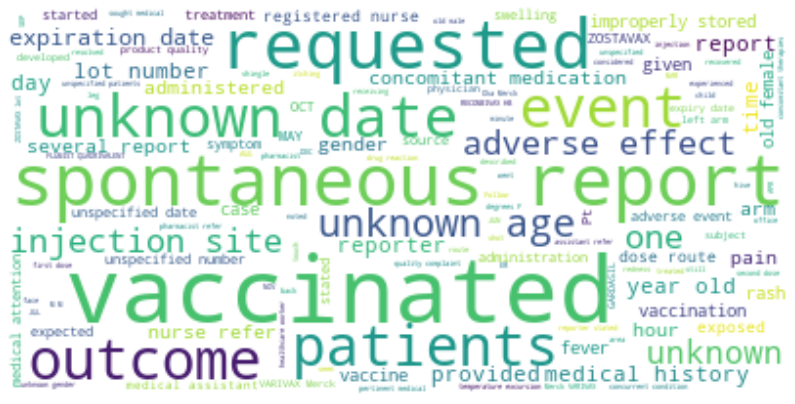

In [10]:
symptoms = WordCloud(
    background_color='white',
    max_words=3000,
    stopwords=stopwords
)

symptoms.generate(' '.join(df['SYMPTOM_TEXT'].astype(str)))


fig = plt.figure(figsize=(14, 18))

plt.imshow(symptoms, interpolation='bilinear')
plt.axis('off')
plt.show()

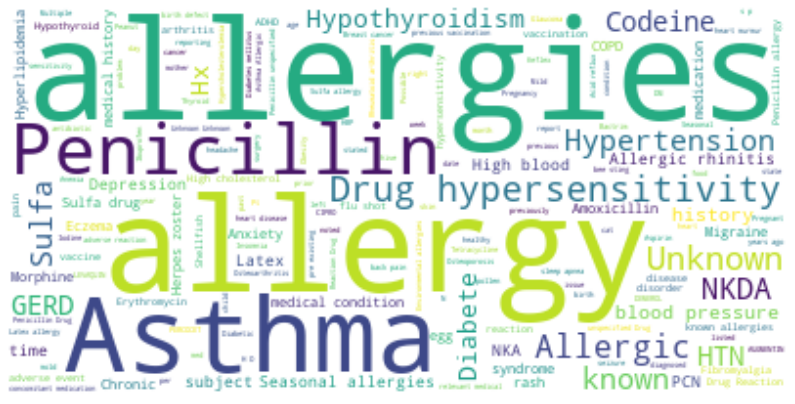

In [11]:
history = WordCloud(
    background_color='white',
    max_words=3000,
    stopwords=stopwords
)

history.generate(' '.join(df['HISTORY'].astype(str)))

fig = plt.figure(figsize=(14, 18))

plt.imshow(history, interpolation='bilinear')
plt.axis('off')
plt.show()

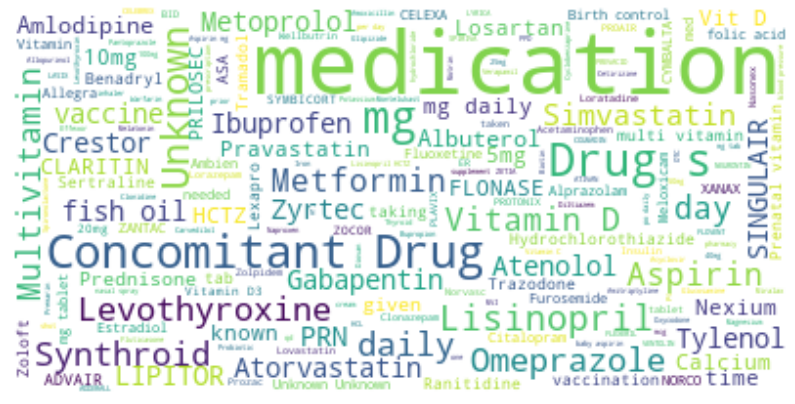

In [12]:
meds = WordCloud(
    background_color='white',
    max_words=3000,
    stopwords=stopwords
)

meds.generate(' '.join(df['OTHER_MEDS'].astype(str)))

fig = plt.figure(figsize=(14, 18))

plt.imshow(meds, interpolation='bilinear')
plt.axis('off')
plt.show()

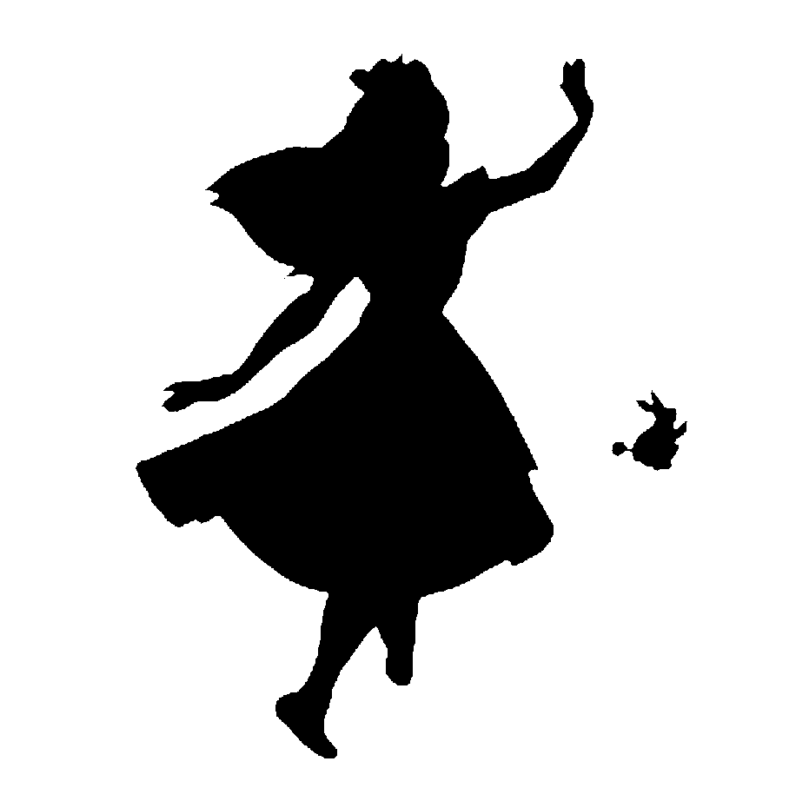

In [15]:
import numpy as np
import urllib
from PIL import Image
# save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

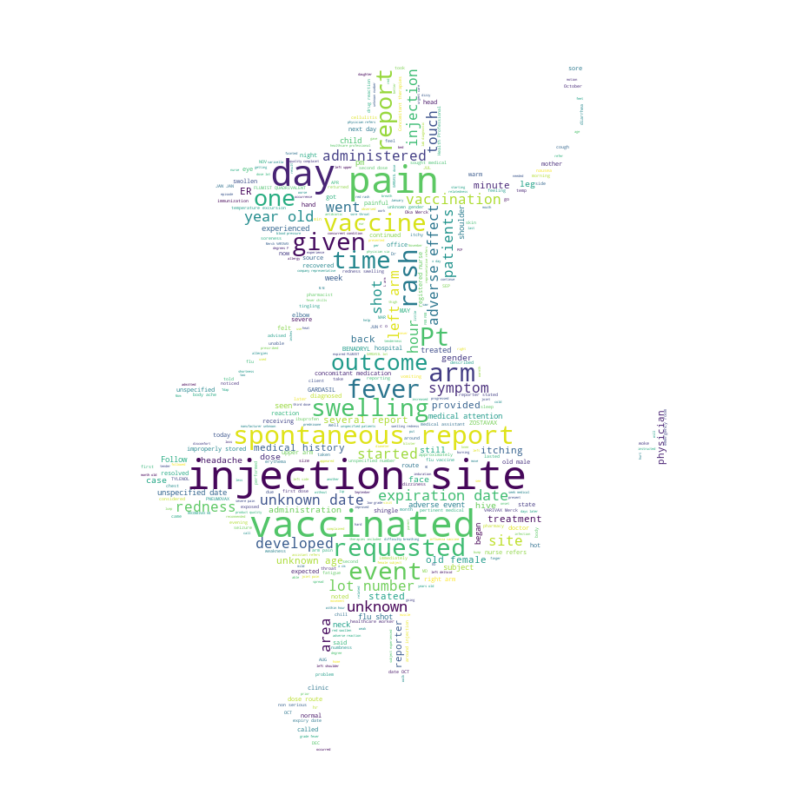

In [61]:
meds = WordCloud(
    background_color='white',
    mask=alice_mask,
    max_words=3000,
    stopwords=stopwords
)

meds.generate(' '.join(df['SYMPTOM_TEXT'].astype(str)))

# display the word cloud
fig = plt.figure(figsize=(14, 18))

#display the word cloud
plt.imshow(meds, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium installed and imported!')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\win10\Anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:Folium installed and imported!


    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38haa244fe_0        16.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        16.9 MB

The following packages will be UPDATED:

  conda                               4.10.3-py38haa244fe_3 --> 4.11.0-py38haa244fe_0




conda-4.11.0         | 16.9 MB   |            |   0% 
conda-4.11.0         | 16.9 MB   |            |   0% 
conda-4.11.0         | 16.9 MB   | 1          |   2% 
conda-4.11.0         | 16.9 MB   | 3          |   3% 
conda-4.11.0         | 16.9 MB   | 4          |   5% 
conda-4.11.0         | 16.9 MB   | 5          |   6% 
cond

In [21]:
url = 'https://raw.githubusercontent.com/mturner49/data-viz-final-project/main/2014VAERSData.csv'
df = pd.read_csv(url, index_col=0, encoding='unicode_escape')
df.head()

,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
VAERS_ID,,,,,,,,,,,,,,,,,,,,,
518048,01/01/2014,OH,43.00,43.0,NaN,F,01/01/2014,Hot pain at injection site; fever; fatigue; he...,NaN,NaN,...,None,Allergy to Allegra,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
518049,01/01/2014,ME,1.11,1.0,0.1,M,01/01/2014,"Red, hard bump at sight of injection.",NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
518050,01/01/2014,TX,60.00,60.0,NaN,F,01/01/2014,"Fast heart rate, head ache, weakness, fever.",NaN,NaN,...,No,"Kidney Transplant. Allergies: quine, penicilli...",NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
518051,01/01/2014,GA,0.78,0.0,0.8,M,01/01/2014,Baby had a hard time swallowing food and bottl...,NaN,NaN,...,No,"Low muscle tone, open PDA, Moderate Pulmonary ...",NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
518052,01/01/2014,TX,32.00,32.0,NaN,F,01/01/2014,"Severe ongoing headaches, severe vomiting afte...",NaN,NaN,...,No,No,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [22]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)

df.dropna(subset = ["STATE"], inplace=True)

In [63]:
df.head()

,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
VAERS_ID,,,,,,,,,,,,,,,,,,,,,
518048,01/01/2014,OH,43.00,43.0,NaN,F,01/01/2014,Hot pain at injection site; fever; fatigue; he...,NaN,NaN,...,None,Allergy to Allegra,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
518049,01/01/2014,ME,1.11,1.0,0.1,M,01/01/2014,"Red, hard bump at sight of injection.",NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
518050,01/01/2014,TX,60.00,60.0,NaN,F,01/01/2014,"Fast heart rate, head ache, weakness, fever.",NaN,NaN,...,No,"Kidney Transplant. Allergies: quine, penicilli...",NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
518051,01/01/2014,GA,0.78,0.0,0.8,M,01/01/2014,Baby had a hard time swallowing food and bottl...,NaN,NaN,...,No,"Low muscle tone, open PDA, Moderate Pulmonary ...",NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
518052,01/01/2014,TX,32.00,32.0,NaN,F,01/01/2014,"Severe ongoing headaches, severe vomiting afte...",NaN,NaN,...,No,No,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [65]:
df_total_death = df.groupby('STATE')['DIED'].apply(lambda x: (x=='Y').sum()).reset_index(name='TOTAL')
df_total_death = df_total_death[df_total_death.TOTAL != 0]
df_total_death.head()

,STATE,TOTAL
1,AL,2
2,AR,1
3,AZ,3
4,CA,2
5,CO,1


In [66]:
usa_countries = r'states.json' # geojson file
# create a plain Georgia map
usa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=3)

threshold_scale = np.linspace(df_total_death['TOTAL'].min(),
                              df_total_death['TOTAL'].max(),
                              6, dtype=int)

threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1

usa_map.choropleth(
    geo_data=usa_countries,
    data=df_total_death,
    columns=['STATE', 'TOTAL'],
    key_on='feature.properties.STUSPS',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Death across USA after vaccine'
)

# display map
usa_map

In [70]:
df_total_cases = df.groupby('STATE').size().reset_index(name='TOTAL')
df_total_cases.head()

,STATE,TOTAL
0,AK,101
1,AL,228
2,AR,225
3,AZ,574
4,CA,2704


In [72]:
usa_countries = r'states.json' # geojson file
# create a plain Georgia map
usa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=3)

threshold_scale = np.linspace(df_total_cases['TOTAL'].min(),
                              df_total_cases['TOTAL'].max(),
                              6, dtype=int)

threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1

usa_map.choropleth(
    geo_data=usa_countries,
    data=df_total_cases,
    columns=['STATE', 'TOTAL'],
    key_on='feature.properties.STUSPS',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Death across USA after vaccine'
)

# display map
usa_map

In [83]:
import plotly.express as px
px.strip(df, x="RECOVD", hover_name="STATE", color="SEX")